In [1]:
#Data processing

In [2]:
!pip install patchify

In [3]:
import os
import cv2
from PIL import Image
import numpy as np
from patchify import patchify
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from matplotlib import pyplot as plt
import random

In [4]:
minmaxscaler = MinMaxScaler()

In [5]:
!ls -lah '/content/drive/MyDrive/terrain_recognization/dataset'

total 8.0K
drwx------ 2 root root 4.0K Sep 30 06:20 masks_images
drwx------ 2 root root 4.0K Sep 30 06:17 terain_images


In [6]:
dataset_root_folder = '/content/drive/MyDrive/terrain_recognization/'

In [7]:
dataset_name = "dataset"

In [8]:
for path, subdirs, files in os.walk(os.path.join(dataset_root_folder, dataset_name)):
  dir_name = path.split(os.path.sep)[-1]
  #print(dir_name)
  if dir_name == 'masks_images': # 'images
    images = os.listdir(path)
    print(path)
    #print(images)
    for i, image_name in enumerate(images):
      if (image_name.endswith('.png')): # '.jpg
        #print(image_name)
        a = True

/content/drive/MyDrive/terrain_recognization/dataset/masks_images


In [9]:
image_patch_size = 256

In [10]:
image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/terain_images/GF2_PMS1__L1A0000564539-MSS1_08.jpg',1)

In [11]:
image.shape

(256, 256, 3)

In [12]:
image_patches = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)

In [13]:
len(image_patches)

1

In [14]:
print(image_patches.shape)

(1, 1, 1, 256, 256, 3)


In [15]:
minmaxscaler = MinMaxScaler()

In [16]:
image_x = image_patches[0,0,:,:]
#MinMaxScaler
image_y = minmaxscaler.fit_transform(image_x.reshape(-1, image_x.shape[-1])).reshape(image_x.shape)

In [17]:
image_y[0].shape

(256, 256, 3)

In [18]:
print(type(image))

<class 'numpy.ndarray'>


In [19]:
type(Image.fromarray(image))

PIL.Image.Image

In [20]:
image.shape

(256, 256, 3)

In [21]:
(image.shape[0]//image_patch_size)*image_patch_size

256

In [22]:
#Processing images

In [52]:
image_dataset = []
mask_dataset = []

for image_type in ['terain_images' , 'masks_images']:
  if image_type == 'terain_images':
    image_extension = 'jpg'
  elif image_type == 'masks_images':
     image_extension = 'png'

  for image_id in range(1,20):
    image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/{image_type}/GF2_PMS1__L1A0000564539-MSS1_0{image_id}.{image_extension}',1)
    if image is not None:
      if image_type == 'masks_images':
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
      #print(image.shape)
      size_x = (image.shape[1]//image_patch_size)*image_patch_size
      size_y = (image.shape[0]//image_patch_size)*image_patch_size
      #print("{} --- {} - {}".format(image.shape, size_x, size_y))
      image = Image.fromarray(image)
      image = image.crop((0,0, size_x, size_y))
      #print("({},  {})".format(image.size[0],image.size[1]))
      image = np.array(image)
      patched_images = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)
      #print(len(patched_images))
      for i in range(patched_images.shape[0]):
        for j in range(patched_images.shape[1]):
          if image_type == 'terain_images':
            individual_patched_image = patched_images[i,j,:,:]
            #print(individual_patched_image.shape)
            individual_patched_image = minmaxscaler.fit_transform(individual_patched_image.reshape(-1, individual_patched_image.shape[-1])).reshape(individual_patched_image.shape)
            individual_patched_image = individual_patched_image[0]
            #print(individual_patched_image.shape)
            image_dataset.append(individual_patched_image)
          elif image_type == 'masks_images':
            individual_patched_mask = patched_images[i,j,:,:]
            individual_patched_mask = individual_patched_mask[0]
            mask_dataset.append(individual_patched_mask)

In [56]:
print(len(image_dataset))
print(len(mask_dataset))


10
10


In [54]:
image_dataset = np.array(image_dataset)
mask_dataset = np.array(mask_dataset)

In [55]:
print(len(image_dataset))
print(len(mask_dataset))

10
10


In [57]:
type(image_dataset[0])

numpy.ndarray

In [58]:
type(np.reshape(image_dataset[0], (image_patch_size, image_patch_size, 3)))

numpy.ndarray

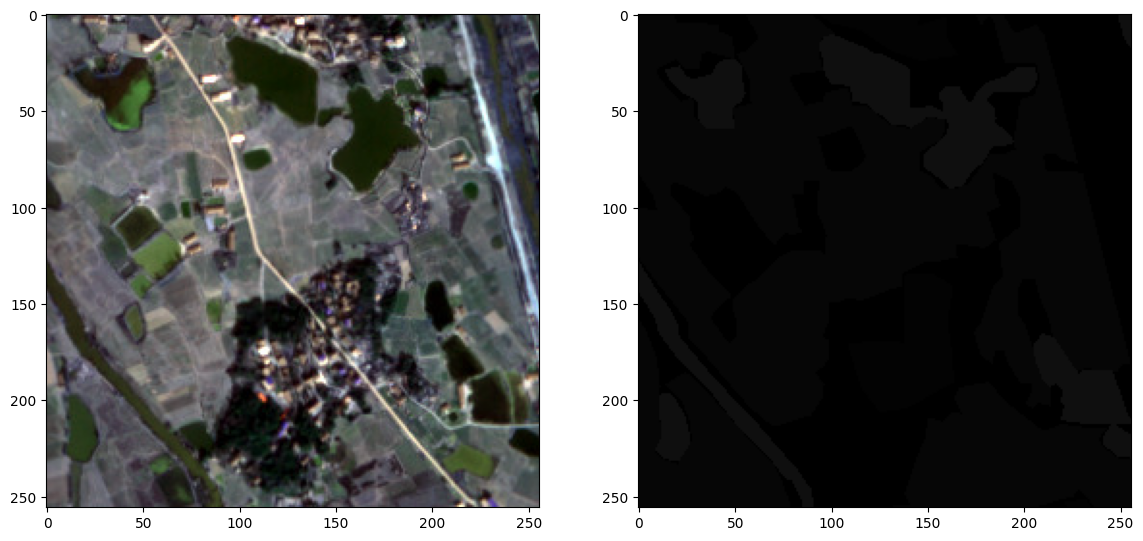

In [138]:
random_image_id = random.randint(0, len(image_dataset-1))

plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
plt.imshow(mask_dataset[random_image_id])

In [121]:
class_traffic_land = '#3C1098'
class_traffic_land = class_traffic_land.lstrip('#')
class_traffic_land= np.array(tuple(int(class_traffic_land[i:i+2], 16) for i in (0,2,4)))
print(class_traffic_land)

class_industrial_land = '#8429F6'
class_industrial_land = class_industrial_land.lstrip('#')
class_industrial_land = np.array(tuple(int(class_industrial_land[i:i+2], 16) for i in (0,2,4)))
print(class_industrial_land)

class_natural_grassland = '#6EC1E4'
class_natural_grassland = class_natural_grassland.lstrip('#')
class_natural_grassland = np.array(tuple(int(class_natural_grassland[i:i+2], 16) for i in (0,2,4)))
print(class_natural_grassland)

class_rural_residentia = '#FEDD3A'
class_rural_residentia = class_rural_residentia.lstrip('#')
class_rural_residentia = np.array(tuple(int(class_rural_residentia[i:i+2], 16) for i in (0,2,4)))
print(class_rural_residentia)

class_urban_residential = '#E2A929'
class_urban_residential = class_urban_residential.lstrip('#')
class_urban_residential = np.array(tuple(int(class_urban_residential[i:i+2], 16) for i in (0,2,4)))
print(class_urban_residential)

class_background = '#9B9B9B'
class_background = class_background.lstrip('#')
class_background = np.array(tuple(int(class_background[i:i+2], 16) for i in (0,2,4)))
print(class_background)

[ 60  16 152]
[132  41 246]
[110 193 228]
[254 221  58]
[226 169  41]
[155 155 155]


In [122]:
mask_dataset.shape[0]

10

In [123]:
label = individual_patched_mask

In [96]:
def rgb_to_label(label):
  label_segment = np.zeros(label.shape, dtype=np.uint8)
  label_segment[np.all(label == class_traffic_land, axis=-1)] = 4
  label_segment[np.all(label == class_industrial_land, axis=-1)] = 1
  label_segment[np.all(label == class_natural_grassland, axis=-1)] = 11
  label_segment[np.all(label == class_rural_residentia, axis=-1)] = 3
  label_segment[np.all(label == class_urban_residential, axis=-1)] = 2
  label_segment[np.all(label == class_background, axis=-1)] = 0
  #print(label_segment)
  label_segment = label_segment[:,:,0]
  #print(label_segment)
  return label_segment

In [97]:
labels = []
for i in range(mask_dataset.shape[0]):
  label = rgb_to_label(mask_dataset[i])
  labels.append(label)

In [98]:
print(len(labels))

10


In [124]:
labels = np.array(labels)

In [100]:
labels[3]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [101]:
labels = np.expand_dims(labels, axis=3)

In [125]:
labels[0]

array([[[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       ...,

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]]], dtype=uint8)

In [126]:
np.unique(labels)

array([0], dtype=uint8)

In [127]:
print("Total unique labels based on masks: ",format(np.unique(labels)))

Total unique labels based on masks:  [0]


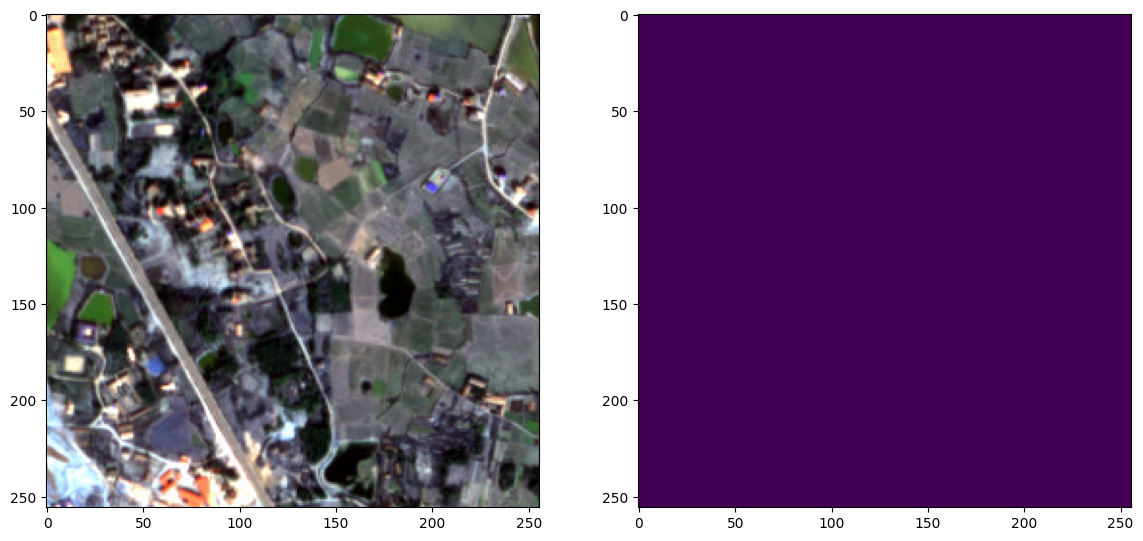

In [133]:
random_image_id = random.randint(0, len(image_dataset-1))

plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
#plt.imshow(mask_dataset[random_image_id])
plt.imshow(labels[random_image_id][:,:,0])